# Ride Sharing Data Engineering Project

Convert raw flatfile of data into workable data model.
Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
import pandas as pd

from IPython.display import Image

In [2]:
df = pd.read_csv('data/uber_data.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


## Dimension Modeling

Convert Flat to Fact-Dimension Schema Structure.

Start by building the visualization in Lucidchart:

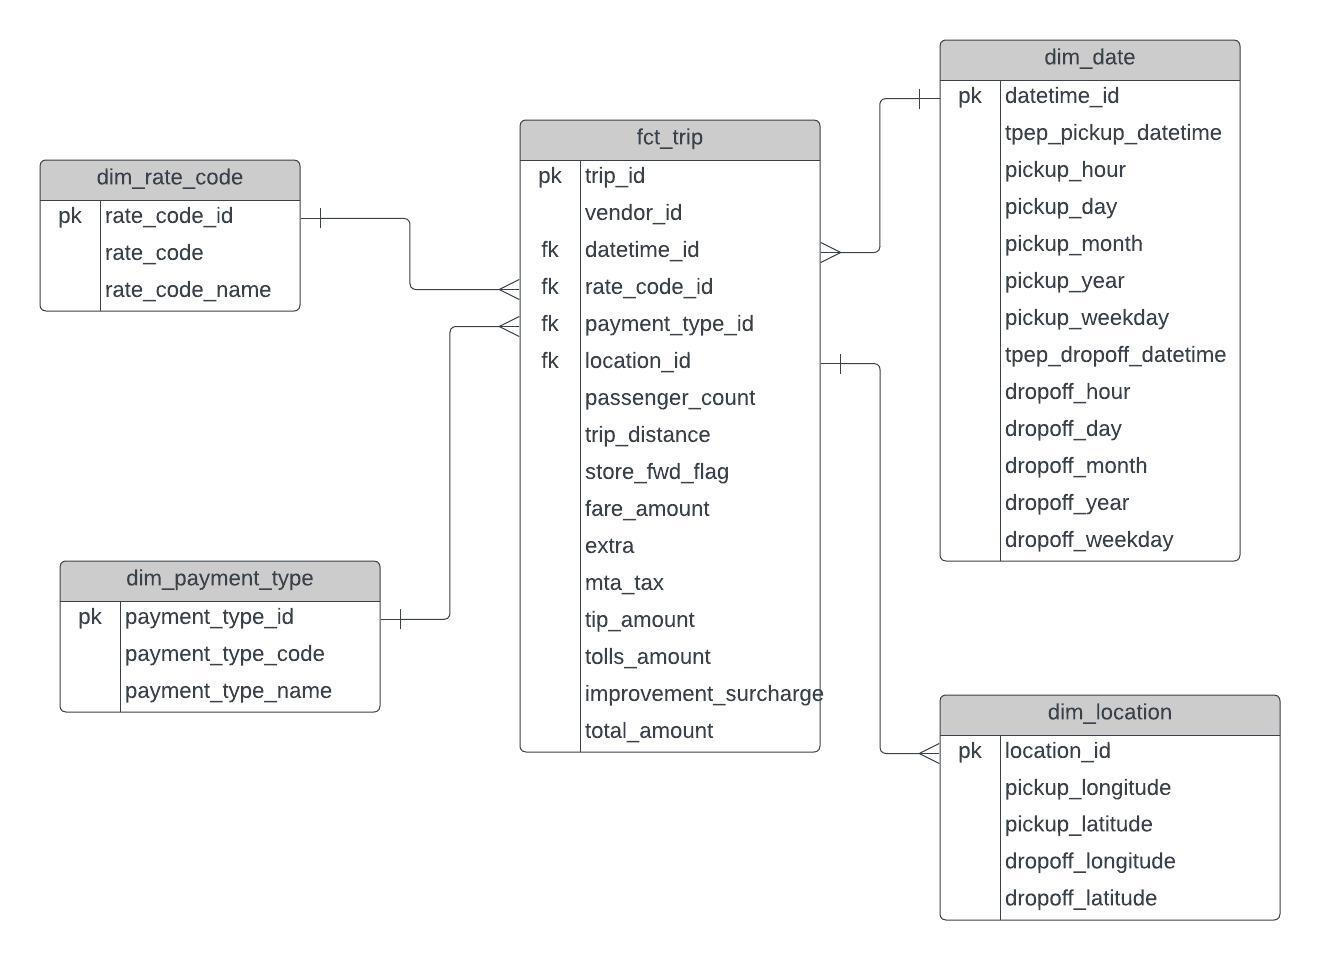

In [4]:
Image(filename='Rideshare Data Model.jpeg', width=750)

## Prep Data

### Create TripID

In [5]:
#drop duplicates, as complete duplicates is extremely unlikely
#setup the trip ID to be the index + 1 so it is a running count starting at 1
df.drop_duplicates().reset_index(drop=True, inplace=True)
df['trip_id'] = df.index + 1
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,1
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,3
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,4
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,5


### Fix Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [7]:
#Update pickup and dropoff times to datetimeformat

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

## Create Dimensional Tables

### dim_datetime

In [9]:
#pull out pickup and dropoff dates, drop any duplicates and 
dim_datetime = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].reset_index(drop=True)

dim_datetime.head()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2016-03-01,2016-03-01 00:07:55
1,2016-03-01,2016-03-01 00:11:06
2,2016-03-01,2016-03-01 00:31:06
3,2016-03-01,2016-03-01 00:00:00
4,2016-03-01,2016-03-01 00:00:00


In [10]:
#add more detail around the pickup times
dim_datetime['pickup_hour'] = dim_datetime['tpep_pickup_datetime'].dt.hour
dim_datetime['pickup_day'] = dim_datetime['tpep_pickup_datetime'].dt.day
dim_datetime['pickup_month'] = dim_datetime['tpep_pickup_datetime'].dt.month
dim_datetime['pickup_year'] = dim_datetime['tpep_pickup_datetime'].dt.year
dim_datetime['pickup_weekday'] = dim_datetime['tpep_pickup_datetime'].dt.weekday

In [11]:
#add more detail around the dropoff times
dim_datetime['dropoff_hour'] = dim_datetime['tpep_dropoff_datetime'].dt.hour
dim_datetime['dropoff_day'] = dim_datetime['tpep_dropoff_datetime'].dt.day
dim_datetime['dropoff_month'] = dim_datetime['tpep_dropoff_datetime'].dt.month
dim_datetime['dropoff_year'] = dim_datetime['tpep_dropoff_datetime'].dt.year
dim_datetime['dropoff_weekday'] = dim_datetime['tpep_dropoff_datetime'].dt.weekday

In [12]:
#assign the primary key
dim_datetime['datetime_id'] = dim_datetime.index + 1
dim_datetime.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday,dropoff_hour,dropoff_day,dropoff_month,dropoff_year,dropoff_weekday,datetime_id
0,2016-03-01,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1,1
1,2016-03-01,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1,2
2,2016-03-01,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1,3
3,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1,4
4,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1,5


In [13]:
#reorder the table
dim_datetime = dim_datetime[['datetime_id', 'tpep_pickup_datetime', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_year', 
                             'pickup_weekday', 'tpep_dropoff_datetime', 'dropoff_hour', 'dropoff_day', 'dropoff_month', 'dropoff_year', 'dropoff_weekday']]

In [14]:
dim_datetime.head()

,datetime_id,tpep_pickup_datetime,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday,tpep_dropoff_datetime,dropoff_hour,dropoff_day,dropoff_month,dropoff_year,dropoff_weekday
0,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,5,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


### dim_rate_code

In [15]:
#start by creating a dictionary of the codes and names:
rate_code_labels = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Neward',
    4: 'Nassau/Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

In [16]:
#now convert this into a dataframe --> could also filter down the original df and then use the map funciton
dim_rate_code = pd.DataFrame(rate_code_labels.items(), columns=['rate_code', 'rate_code_name'])

#create the primary key from the index
dim_rate_code['rate_code_id'] = dim_rate_code.index + 1

#reorder the columns
dim_rate_code = dim_rate_code[['rate_code_id', 'rate_code', 'rate_code_name']]

dim_rate_code

,rate_code_id,rate_code,rate_code_name
0,1,1,Standard rate
1,2,2,JFK
2,3,3,Neward
3,4,4,Nassau/Westchester
4,5,5,Negotiated fare
5,6,6,Group ride


### dim_payment_type

In [17]:
#start by creating a dictionary of the codes and names:
payment_type_lables = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

In [18]:
#now convert this into a dataframe --> could also filter down the original df and then use the map funciton
dim_payment_type = pd.DataFrame(payment_type_lables.items(), columns=['payment_type_code', 'payment_type_name'])

#create the primary key from the index
dim_payment_type['payment_type_id'] = dim_payment_type.index + 1

#reorder the columns
dim_payment_type = dim_payment_type[['payment_type_id', 'payment_type_code', 'payment_type_name']]

dim_payment_type

,payment_type_id,payment_type_code,payment_type_name
0,1,1,Credit Card
1,2,2,Cash
2,3,3,No charge
3,4,4,Dispute
4,5,5,Unknown
5,6,6,Voided trip


### dim_location

In [19]:
#split out location fields
dim_location = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].reset_index(drop=True)

#add the index as the location_id
dim_location['location_id'] = dim_location.index + 1

#reorder columns
dim_location = dim_location[['location_id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]

In [20]:
dim_location.head()

,location_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,1,-73.976746,40.765152,-74.004265,40.746128
1,2,-73.983482,40.767925,-74.005943,40.733166
2,3,-73.782021,40.644810,-73.974541,40.675770
3,4,-73.863419,40.769814,-73.969650,40.757767
4,5,-73.971741,40.792183,-74.177170,40.695053


## Create Fact Table

Create a copy of the dataframe and then merge in the other tables to get the IDs in the fact table. Then we'll drop our unecessary columns.

In [21]:
#start by creating a copy of our original df
fact_table = df.copy()

fact_table.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,1
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,3
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,4
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,5


### Datetime ID

In [22]:
#merge in the datetime table

fact_table = fact_table.merge(dim_datetime, left_on='trip_id', right_on='datetime_id', how='left')

In [23]:
fact_table.head(3)

,VendorID,tpep_pickup_datetime_x,tpep_dropoff_datetime_x,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,pickup_day,pickup_month,pickup_year,pickup_weekday,tpep_dropoff_datetime_y,dropoff_hour,dropoff_day,dropoff_month,dropoff_year,dropoff_weekday
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1


### Location ID

In [24]:
#merge in the location table

fact_table = fact_table.merge(dim_location, left_on='trip_id', right_on='location_id', how='left')

In [25]:
fact_table.head(3)

,VendorID,tpep_pickup_datetime_x,tpep_dropoff_datetime_x,passenger_count,trip_distance,pickup_longitude_x,pickup_latitude_x,RatecodeID,store_and_fwd_flag,dropoff_longitude_x,...,dropoff_hour,dropoff_day,dropoff_month,dropoff_year,dropoff_weekday,location_id,pickup_longitude_y,pickup_latitude_y,dropoff_longitude_y,dropoff_latitude_y
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,0,1,3,2016,1,1,-73.976746,40.765152,-74.004265,40.746128
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,0,1,3,2016,1,2,-73.983482,40.767925,-74.005943,40.733166
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,0,1,3,2016,1,3,-73.782021,40.644810,-73.974541,40.675770


### Rate Code ID

In [26]:
#merge in the rate code table

fact_table = fact_table.merge(dim_rate_code, left_on='RatecodeID', right_on='rate_code_id', how='left')

In [27]:
fact_table.head(3)

,VendorID,tpep_pickup_datetime_x,tpep_dropoff_datetime_x,passenger_count,trip_distance,pickup_longitude_x,pickup_latitude_x,RatecodeID,store_and_fwd_flag,dropoff_longitude_x,...,dropoff_year,dropoff_weekday,location_id,pickup_longitude_y,pickup_latitude_y,dropoff_longitude_y,dropoff_latitude_y,rate_code_id,rate_code,rate_code_name
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,2016,1,1,-73.976746,40.765152,-74.004265,40.746128,1,1,Standard rate
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,2016,1,2,-73.983482,40.767925,-74.005943,40.733166,1,1,Standard rate
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,2016,1,3,-73.782021,40.644810,-73.974541,40.675770,1,1,Standard rate


### Payment Type ID

In [28]:
#merge in the payment type table
fact_table = fact_table.merge(dim_payment_type, left_on='payment_type', right_on='payment_type_id', how='left')

In [29]:
fact_table.head(3)

,VendorID,tpep_pickup_datetime_x,tpep_dropoff_datetime_x,passenger_count,trip_distance,pickup_longitude_x,pickup_latitude_x,RatecodeID,store_and_fwd_flag,dropoff_longitude_x,...,pickup_longitude_y,pickup_latitude_y,dropoff_longitude_y,dropoff_latitude_y,rate_code_id,rate_code,rate_code_name,payment_type_id,payment_type_code,payment_type_name
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,-73.976746,40.765152,-74.004265,40.746128,1,1,Standard rate,1,1,Credit Card
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,-73.983482,40.767925,-74.005943,40.733166,1,1,Standard rate,1,1,Credit Card
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,-73.782021,40.644810,-73.974541,40.675770,1,1,Standard rate,1,1,Credit Card


### Drop Unecessary Columns

In [30]:
#create new table with only fact table columns

fct_trip = fact_table[['trip_id','VendorID','datetime_id','rate_code_id','payment_type_id','location_id','passenger_count'
                        ,'trip_distance','store_and_fwd_flag','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount']]

In [31]:
#rename a few columns

fct_trip.rename(columns={'VendorID': 'vendor_id', 'store_and_fwd_flag': 'store_fwd_flag'}, inplace=True)

/var/folders/_z/9zltq2bj1dz1k05g4mtz4gq00000gn/T/ipykernel_6135/2713222117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_trip.rename(columns={'VendorID': 'vendor_id', 'store_and_fwd_flag': 'store_fwd_flag'}, inplace=True)


In [32]:
fct_trip.head(10)

,trip_id,vendor_id,datetime_id,rate_code_id,payment_type_id,location_id,passenger_count,trip_distance,store_fwd_flag,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,1,1,1,1,1,1,2.50,N,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,2,1,2,1,1,2,1,2.90,N,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,3,2,3,1,1,3,2,19.98,N,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,4,2,4,1,1,4,3,10.78,N,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,5,2,5,3,1,5,5,30.43,N,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,6,2,6,1,1,6,5,5.92,N,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,7,2,7,1,2,7,6,5.72,N,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,8,1,8,1,3,8,1,6.20,N,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,9,1,9,1,1,9,1,0.70,N,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,10,2,10,1,1,10,3,7.18,N,23.5,0.5,0.5,3.20,0.00,0.3,28.00


## Data Validation

### Check for missing values

In [33]:
fct_trip.isna().sum()

trip_id                  0
vendor_id                0
datetime_id              0
rate_code_id             0
payment_type_id          0
location_id              0
passenger_count          0
trip_distance            0
store_fwd_flag           0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [35]:
dim_datetime.isna().sum()

datetime_id              0
tpep_pickup_datetime     0
pickup_hour              0
pickup_day               0
pickup_month             0
pickup_year              0
pickup_weekday           0
tpep_dropoff_datetime    0
dropoff_hour             0
dropoff_day              0
dropoff_month            0
dropoff_year             0
dropoff_weekday          0
dtype: int64

In [36]:
dim_rate_code.isna().sum()

rate_code_id      0
rate_code         0
rate_code_name    0
dtype: int64

In [37]:
dim_payment_type.isna().sum()

payment_type_id      0
payment_type_code    0
payment_type_name    0
dtype: int64

In [38]:
dim_location.isna().sum()

location_id          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
dtype: int64